In [36]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


In [37]:
init_z = State(y=3000.0 , v=0.0)

,values
y,3000.0
v,0.0


In [38]:
init_z=State(y=3000.0,v=0.0)
Rho=1.225
Cd=0.05
S=1
g=9.8
M=85
t_on=10
t_end=30
h=1
system_z = System(init=init_z,t_0=0,t_end=t_end,dt=h)

,values
init,y 3000.0 v 0.0 dtype: float64
t_0,0
t_end,30
dt,1


In [39]:
def bukaisan(state, t, system):
    y, v= state
    dt=h
    dydt=v+g*dt
    y=y-0.5*(dydt+v)*dt
    return State(v=dydt,y=y)

In [40]:
bukaisan(init_z, 0, system_z)

,values
v,9.8
y,2995.1


def slope_func_z(state, t, system):
    y, v= state
    dt=h
    dvdt=(1/2)*1.225*v*v*1*0.05/85-9.8
    if dvdt<0:
        dydt = v+(-(1/2)*1.225*v*v*1*0.05/85+9.81)*dt
        y=y-0.5*(dydt+v)*dt
    else:
            dydt=v
            y=y-0.5*(dydt+v)*dt
    
    return State(v=dydt,y=y)

 if dvdt>0:
        dydt = v+(-(1/2)*Rho*v*v*S*Cd/M+g)*dt
        y=y-0.5*(dydt+v)*dt
    else:
            dydt=v
            y=y-0.5*(dydt+v)*dt
    
    return State(v=dydt,y=y)

In [41]:
slope_func_z(init_z, 0, system_z)

,values
v,9.810
y,2995.095


In [42]:
def simulation(system,slope_func_z,bukaisan):
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts= linrange(t_0, t_end, dt)
    for t in ts:
        if t<t_on:
            frame.row[t+dt] = bukaisan(frame.row[t], t, system)
        else:
                frame.row[t+dt] = slope_func_z(frame.row[t], t, system)
    
    return frame

In [43]:
results = simulation(system_z , slope_func_z,bukaisan)

,y,v
0,3000.000000,0.000000
1,2995.100000,9.800000
2,2980.400000,19.600000
3,2955.900000,29.400000
4,2921.600000,39.200000
5,2877.500000,49.000000
6,2823.600000,58.800000
7,2759.900000,68.600000
8,2686.400000,78.400000
9,2603.100000,88.200000


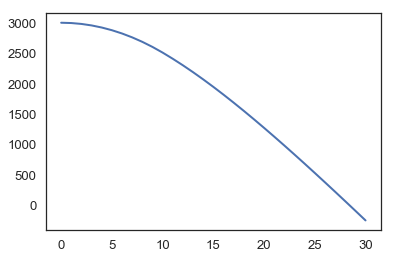

In [44]:
plot(results.y)

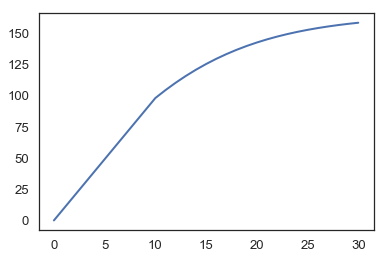

In [45]:
plot(results.v)